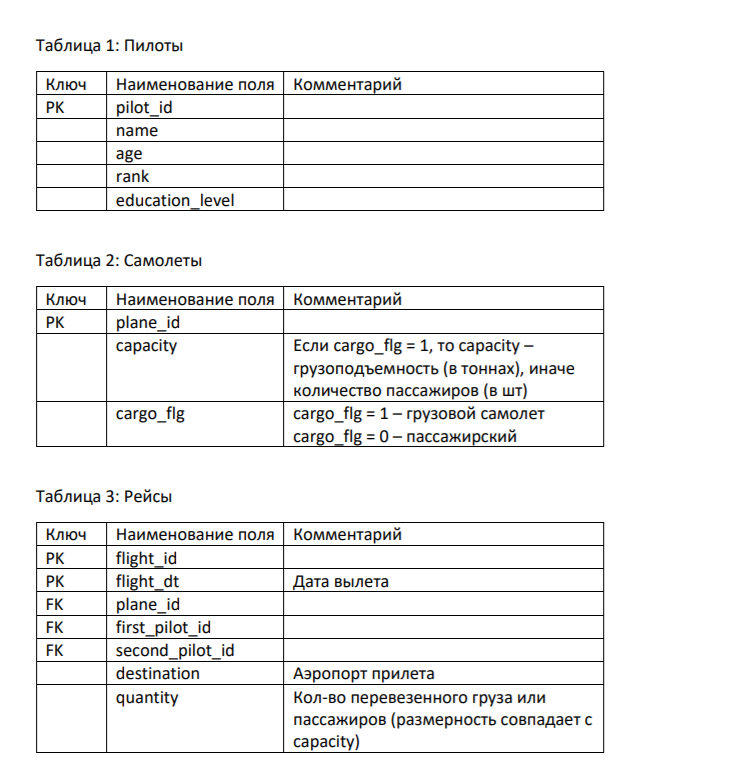

### Задача 1. Напишите запрос, который выведет пилотов, которые в качестве второго пилота в августе этого года ездили в аэропорт Шереметьево.
### Задача 2. Выведите пилотов старше 45 лет, которые совершили больше 30 полетов на грузовых самолетах.
### Задача 3. Выведите ТОП 10 пилотов-капитанов (first_pilot_id), которые перевезли наибольшее число пассажиров в этом году.

В первую очередь, я сгенерировал тестовые данные: 400 строк в таблице "Рейсы", 50 строк в таблице "Пилоты", 4 строки в таблице "Самолеты"

In [1]:
import pandas as pd
import numpy as np
import sqlite3
con = sqlite3.connect('Tinkoff_test_task_db')

In [2]:
#Функция select() для удобства
def select(sql):
    return pd.read_sql(sql, con)

#### Id for google sheet
- plains - 1ZkcbRrcsbW0UN9eCJkNERzY_qNPHfEYyIAJPwv6ntHA 
- pilots - 17gEmzFYhRwbdFNHdVV8ovyH3kroeGmCGXwFmPjR0Tz8
- flights - 1j1cVD6e_Bmi3MMApwfBsZvU36UTWk1p7j8p1TmjS4I4

Загружаем созданные данные из гугл таблиц в sql

In [3]:
planes_id = '1ZkcbRrcsbW0UN9eCJkNERzY_qNPHfEYyIAJPwv6ntHA'
pilots_id = '17gEmzFYhRwbdFNHdVV8ovyH3kroeGmCGXwFmPjR0Tz8'
flights_id = '1j1cVD6e_Bmi3MMApwfBsZvU36UTWk1p7j8p1TmjS4I4'

planes_url = f'https://docs.google.com/spreadsheets/d/{planes_id}/export?format=csv'
pilots_url = f'https://docs.google.com/spreadsheets/d/{pilots_id}/export?format=csv'
flights_url = f'https://docs.google.com/spreadsheets/d/{flights_id}/export?format=csv'

df_planes = pd.read_csv(planes_url)
df_pilots = pd.read_csv(pilots_url)
df_flights = pd.read_csv(flights_url)

df_planes.to_sql('planes', con, if_exists = 'replace', index = False)
df_pilots.to_sql('pilots', con, if_exists = 'replace', index = False)
df_flights.to_sql('flights', con, if_exists = 'replace', index = False)

In [ ]:
"""
# Альтернативная загрузка (из локальных файлов)

df_planes = pd.read_csv('planes.csv')
df_pilots = pd.read_csv('pilots.csv')
df_flights = pd.read_csv('flights.csv')

df_planes.to_sql('planes', con, if_exists = 'replace', index = False)
df_pilots.to_sql('pilots', con, if_exists = 'replace', index = False)
df_flights.to_sql('flights', con, if_exists = 'replace', index = False)
"""

In [5]:
df_planes

,plane_id,capacity,cargo_flg
0,777,340,0
1,737,149,0
2,100,50,1
3,115,75,1


In [6]:
cur = con.cursor()

In [7]:
sql = '''
drop table if exists agg_table;
create table agg_table as
select 
f.flight_id, f.flight_dt, f.first_pilot_id, f.second_pilot_id, f.destination, f.quantity,
p.pilot_id, p.name, p.age,
pl.plane_id, pl.cargo_flg
from flights as f
join pilots as p on p.pilot_id = f.first_pilot_id or p.pilot_id = f.second_pilot_id
join plains as pl on pl.plane_id = f.plane_id
'''
cur.executescript(sql)

### Задача 1. Напишите запрос, который выведет пилотов, которые в качестве второго пилота в августе этого года ездили в аэропорт Шереметьево.

In [8]:
# После SQL Formatter
sql = '''
SELECT DISTINCT t.pilot_id,
                t.name
FROM agg_table AS t
WHERE t.destination = 'Шереметьево'
  AND t.second_pilot_id = t.pilot_id
  AND t.flight_dt BETWEEN '2021-08-01 00:00:00' AND '2021-08-31 23:59:59'
ORDER BY t.pilot_id
'''
select(sql)

,pilot_id,name
0,4,Митрофанов Фёдор Петрович
1,5,Смирнова Алиса Владимировна
2,6,Носов Дмитрий Богданович
3,7,Матвеев Макар Александрович
4,12,Горячева Анна Марковна
5,14,Ткачев Илья Максимович
6,17,Нечаева Таисия Макаровна
7,19,Сидоров Александр Тимофеевич
8,28,Ушакова Виктория Руслановна
9,29,Мартынов Кирилл Егорович


In [9]:
# Изначальный запрос
sql = '''
select distinct t.pilot_id, t.name from agg_table as t
where t.destination = 'Шереметьево'
and t.second_pilot_id = t.pilot_id
and t.flight_dt between '2021-08-01 00:00:00' and '2021-08-31 23:59:59'
order by t.pilot_id
'''
select(sql)

,pilot_id,name
0,4,Митрофанов Фёдор Петрович
1,5,Смирнова Алиса Владимировна
2,6,Носов Дмитрий Богданович
3,7,Матвеев Макар Александрович
4,12,Горячева Анна Марковна
5,14,Ткачев Илья Максимович
6,17,Нечаева Таисия Макаровна
7,19,Сидоров Александр Тимофеевич
8,28,Ушакова Виктория Руслановна
9,29,Мартынов Кирилл Егорович


### Задача 2. Выведите пилотов старше 45 лет, которые совершили больше 30 полетов на грузовых самолетах.

In [10]:
# После SQL Formatter
sql = '''
SELECT t.pilot_id,
       t.name
FROM agg_table AS t
WHERE t.age > 45
  AND t.cargo_flg = 1
GROUP BY t.name,
         t.pilot_id
HAVING count(*) > 30
ORDER BY t.pilot_id
'''
select(sql)

,pilot_id,name
0,7,Матвеев Макар Александрович
1,25,Воробьев Даниил Вячеславович


In [11]:
# Изначальный запрос
sql = '''
select t.pilot_id, t.name from agg_table as t
where t.age > 45 and t.cargo_flg = 1
group by t.name, t.pilot_id
having count(*) > 30
order by t.pilot_id
'''
select(sql)

,pilot_id,name
0,7,Матвеев Макар Александрович
1,25,Воробьев Даниил Вячеславович


id 7, 25 - больше 45 лет и совершили более 30 полетов, так что их должно выводить

id 36 - меньше 45 лет и совершил более 30 полетов, вывести не должен

### Задача 3. Выведите ТОП 10 пилотов-капитанов (first_pilot_id), которые перевезли наибольшее число пассажиров в этом году.

Пилот под номер 9 имеет 2729 перевезенных пассажиров суммарно за 2020 и 2021 года, при этом 2444 пассажира за 2020 год. 
По запросу он не выводится, а значит дата обрабатывается нормально.

In [12]:
# После SQL Formatter
sql = '''
WITH quantity_sum_table AS
  (SELECT t.pilot_id,
          t.name,
          sum(t.quantity) AS quantity_sum
   FROM agg_table AS t
   WHERE t.first_pilot_id = t.pilot_id
     AND t.cargo_flg = 0
     AND t.flight_dt BETWEEN '2021-01-01 00:00:00' AND '2021-12-31 23:59:59'
   GROUP BY t.pilot_id),
     row_number_table AS
  (SELECT *,
          row_number() over(
                            ORDER BY q.quantity_sum DESC) AS row_num
   FROM quantity_sum_table AS q)
SELECT rn.pilot_id,
       rn.name,
       rn.quantity_sum
FROM row_number_table AS rn
WHERE rn.row_num <= 10
'''
select(sql)

,pilot_id,name,quantity_sum
0,25,Воробьев Даниил Вячеславович,3163
1,7,Матвеев Макар Александрович,2060
2,11,Филатов Иван Владиславович,1711
3,21,Дорофеева Елизавета Данииловна,1529
4,44,Лукин Марк Адамович,1492
5,3,Данилов Ярослав Даниилович,1383
6,26,Фролов Кирилл Кириллович,1280
7,35,Ульянов Дмитрий Семёнович,1230
8,14,Ткачев Илья Максимович,1170
9,16,Смирнов Алексей Артёмович,1168


In [13]:
# Изначальный запрос
sql = '''
with quantity_sum_table as (
select t.pilot_id, t.name, sum(t.quantity) as quantity_sum from agg_table as t
where t.first_pilot_id = t.pilot_id
and t.cargo_flg = 0
and t.flight_dt between '2021-01-01 00:00:00' and '2021-12-31 23:59:59'
group by t.pilot_id),

row_number_table as (select *, 
row_number() over(order by q.quantity_sum desc) as row_num
from quantity_sum_table as q)

select rn.pilot_id, rn.name, rn.quantity_sum from row_number_table as rn
where rn.row_num <= 10
'''
select(sql)

,pilot_id,name,quantity_sum
0,25,Воробьев Даниил Вячеславович,3163
1,7,Матвеев Макар Александрович,2060
2,11,Филатов Иван Владиславович,1711
3,21,Дорофеева Елизавета Данииловна,1529
4,44,Лукин Марк Адамович,1492
5,3,Данилов Ярослав Даниилович,1383
6,26,Фролов Кирилл Кириллович,1280
7,35,Ульянов Дмитрий Семёнович,1230
8,14,Ткачев Илья Максимович,1170
9,16,Смирнов Алексей Артёмович,1168
